In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('returns.csv', index_col=0)
df['arg_learning_rate'] = df['arg_learning_rate'].fillna('-')

/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


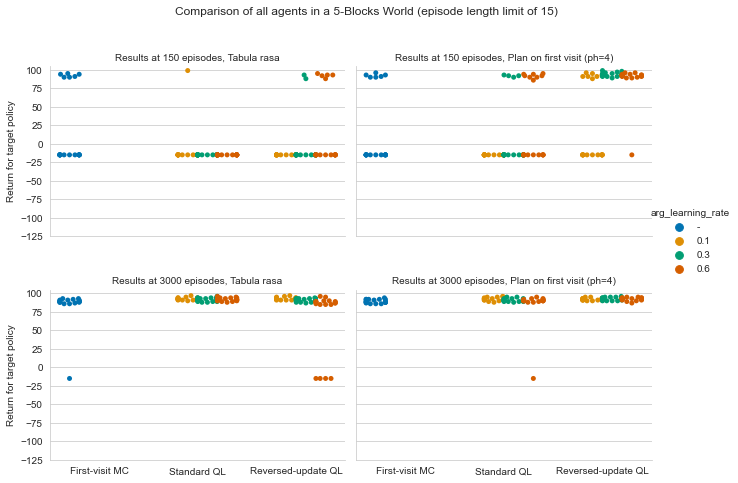

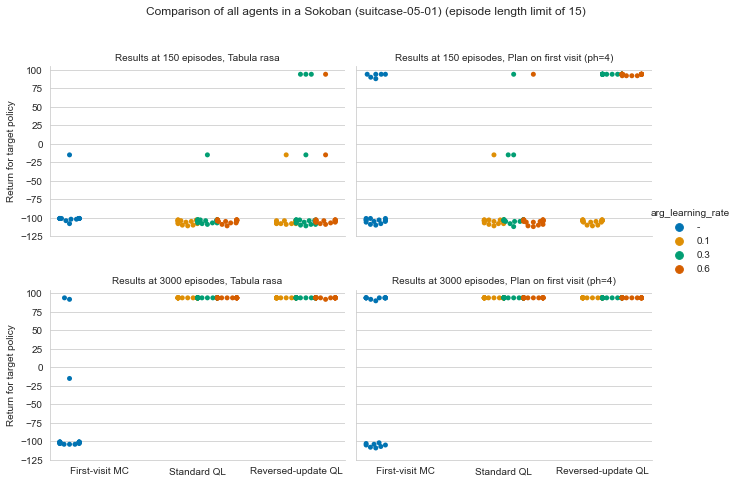

In [3]:
for mdp_label, gr in df.groupby('mdp_label'):

    selector = gr['episode_id'].isin([150, 3000])
    g = sns.catplot(x='algorithm_label', y='target_policy_return',
                    kind='swarm',
                    order=['First-visit MC', 'Standard QL', 'Reversed-update QL'],
                    hue='arg_learning_rate', hue_order=['-', 0.1, 0.3, 0.6],
                    col='planner_label',
                    row='episode_id',
                    data=gr[selector],
                    palette='colorblind',
                    dodge=True,
                    aspect=4/3.0, height=3.4,
                    facet_kws={'subplot_kws':{'yticks':range(-125, 101, 25), 'ylim':(-125, 105)}})
    
    max_episode_length = df.loc[0, 'arg_max_episode_length']
    plt.suptitle(f'Comparison of all agents in a {mdp_label} (episode length limit of {max_episode_length})')
    g.set_titles('Results at {row_name} episodes, {col_name}') 
    g.set_ylabels(f'Return for target policy')
    g.set_xlabels('') 
    plt.tight_layout(h_pad=3.5, rect=[0,0,0.9,0.95])
    
    plt.savefig(f'plots/exp4.{mdp_label}.1.pdf')

In [4]:
vvs = {'behavior_policy_return', 'target_policy_return'}

df_molten = df.melt(id_vars=set(df.columns) - vvs, value_vars=vvs)
df_molten

,arg_behavior_policy,arg_max_episode_length,arg_blocks_world_size,arg_plan_for_new_states,arg_mdp,full_algorithm_label,arg_db_file,arg_show_progress_bar,arg_sokoban_level_name,mdp_label,arg_episodes,arg_control_algorithm,arg_epsilon,algorithm_label,planner_label,arg_learning_rate,arg_planning_horizon,episode_id,variable,value
0,planning_exploring_starts,15,5.0,False,blocksworld,"Standard QL, $\alpha=0.3$",returns.0172.csv,True,NaN,5-Blocks World,3000,q_learning,0.3,Standard QL,Tabula rasa,0.3,4,1,target_policy_return,-15.0
1,planning_exploring_starts,15,5.0,False,blocksworld,"Standard QL, $\alpha=0.3$",returns.0172.csv,True,NaN,5-Blocks World,3000,q_learning,0.3,Standard QL,Tabula rasa,0.3,4,2,target_policy_return,-15.0
2,planning_exploring_starts,15,5.0,False,blocksworld,"Standard QL, $\alpha=0.3$",returns.0172.csv,True,NaN,5-Blocks World,3000,q_learning,0.3,Standard QL,Tabula rasa,0.3,4,3,target_policy_return,-15.0
3,planning_exploring_starts,15,5.0,False,blocksworld,"Standard QL, $\alpha=0.3$",returns.0172.csv,True,NaN,5-Blocks World,3000,q_learning,0.3,Standard QL,Tabula rasa,0.3,4,4,target_policy_return,-15.0
4,planning_exploring_starts,15,5.0,False,blocksworld,"Standard QL, $\alpha=0.3$",returns.0172.csv,True,NaN,5-Blocks World,3000,q_learning,0.3,Standard QL,Tabula rasa,0.3,4,5,target_policy_return,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359995,planning_epsilon_greedy,15,NaN,True,sokoban,"Standard QL, $\alpha=0.1$",returns.0157.csv,True,suitcase-05-01,Sokoban (suitcase-05-01),3000,q_learning,0.2,Standard QL,Plan on first visit (ph=4),0.1,4,2996,behavior_policy_return,94.0
3359996,planning_epsilon_greedy,15,NaN,True,sokoban,"Standard QL, $\alpha=0.1$",returns.0157.csv,True,suitcase-05-01,Sokoban (suitcase-05-01),3000,q_learning,0.2,Standard QL,Plan on first visit (ph=4),0.1,4,2997,behavior_policy_return,94.0
3359997,planning_epsilon_greedy,15,NaN,True,sokoban,"Standard QL, $\alpha=0.1$",returns.0157.csv,True,suitcase-05-01,Sokoban (suitcase-05-01),3000,q_learning,0.2,Standard QL,Plan on first visit (ph=4),0.1,4,2998,behavior_policy_return,-103.0
3359998,planning_epsilon_greedy,15,NaN,True,sokoban,"Standard QL, $\alpha=0.1$",returns.0157.csv,True,suitcase-05-01,Sokoban (suitcase-05-01),3000,q_learning,0.2,Standard QL,Plan on first visit (ph=4),0.1,4,2999,behavior_policy_return,94.0


In [5]:
df.full_algorithm_label.unique()

array(['Standard QL, $\\alpha=0.3$', 'Reversed-update QL, $\\alpha=0.6$',
       'Standard QL, $\\alpha=0.1$', 'Reversed-update QL, $\\alpha=0.3$',
       'Standard QL, $\\alpha=0.6$', 'First-visit MC',
       'Reversed-update QL, $\\alpha=0.1$'], dtype=object)

In [6]:
df.shape, df_molten.shape

((1680000, 20), (3360000, 20))

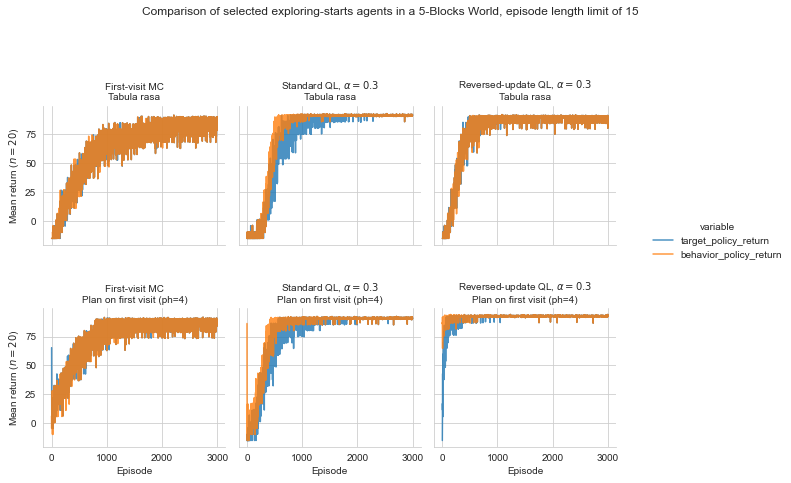

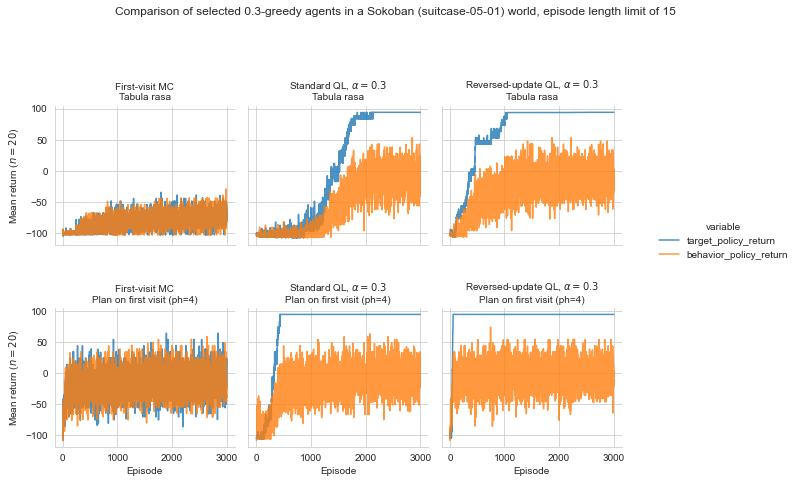

In [11]:
for mdp_label, gr in df_molten.groupby('mdp_label'):

    selector = (gr['full_algorithm_label'].isin(['First-visit MC',
                                                 'Standard QL, $\\alpha=0.3$',
                                                 'Reversed-update QL, $\\alpha=0.3$']))
    
    g = sns.FacetGrid(gr[selector], col='full_algorithm_label', row='planner_label', hue='variable',
                      col_order=['First-visit MC', 
                                 'Standard QL, $\\alpha=0.3$', 
                                 'Reversed-update QL, $\\alpha=0.3$'],
                      aspect=0.9, height=3.4)
    g.map(sns.lineplot, 'episode_id', 'value', ci=None, alpha=0.8, palette='colorblind')
    g.add_legend()
    
    g.set_ylabels(f'Mean return ($n=20$)')
    g.set_xlabels(f'Episode')
    g.set_titles('{col_name}\n{row_name}')
    
    max_episode_length = df.loc[0, 'arg_max_episode_length']
    if 'Sokoban' in mdp_label:
        epsilon = df.loc[0, 'arg_epsilon']
        plt.suptitle(f'Comparison of selected {epsilon}-greedy agents in a {mdp_label} world, episode length limit of {max_episode_length}')
    else:
        plt.suptitle(f'Comparison of selected exploring-starts agents in a {mdp_label}, episode length limit of {max_episode_length}')
        
    plt.tight_layout(h_pad=3.5, rect=[0,0,0.8,0.9])
    plt.savefig(f'plots/exp4.{mdp_label}.2.pdf')

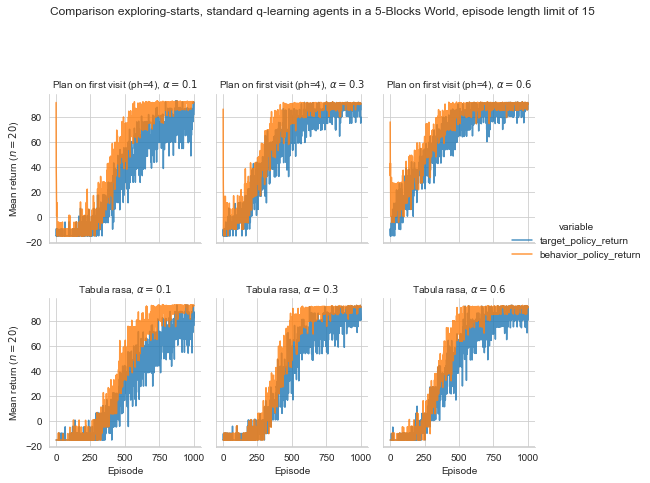

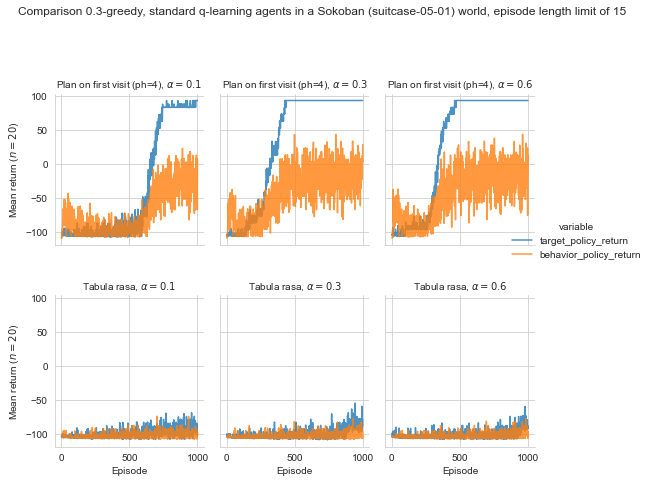

In [10]:
for mdp_label, gr in df_molten.groupby('mdp_label'):

    selector = (gr['algorithm_label'] == 'Standard QL') \
                & (gr['episode_id'] <= 1000)
    
    g = sns.FacetGrid(gr[selector], col='arg_learning_rate', row='planner_label', hue='variable',
                      col_order=[0.1, 0.3, 0.6],
                      row_order=['Plan on first visit (ph=4)', 'Tabula rasa'],
                      aspect=0.7, height=3.4)
    g.map(sns.lineplot, 'episode_id', 'value', ci=None, alpha=0.8, palette='colorblind')
    g.add_legend()
    
    g.set_ylabels(f'Mean return ($n=20$)')
    g.set_xlabels(f'Episode')
    g.set_titles('{row_name}, $\\alpha={col_name}$')
    
    max_episode_length = df.loc[0, 'arg_max_episode_length']
    if 'Sokoban' in mdp_label:
        epsilon = df.loc[0, 'arg_epsilon']
        plt.suptitle(f'Comparison {epsilon}-greedy, standard q-learning agents in a {mdp_label} world, episode length limit of {max_episode_length}')
    else:
        plt.suptitle(f'Comparison exploring-starts, standard q-learning agents in a {mdp_label}, episode length limit of {max_episode_length}')
    
    plt.tight_layout(h_pad=3.5, rect=[0,0,0.85,0.9])
    plt.savefig(f'plots/exp4.{mdp_label}.3.pdf')

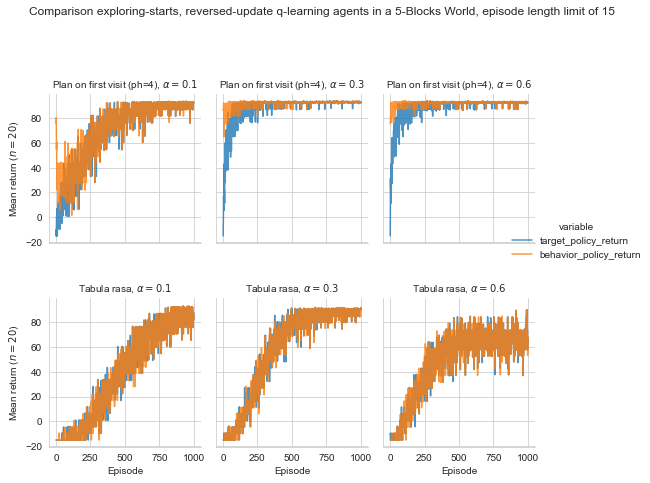

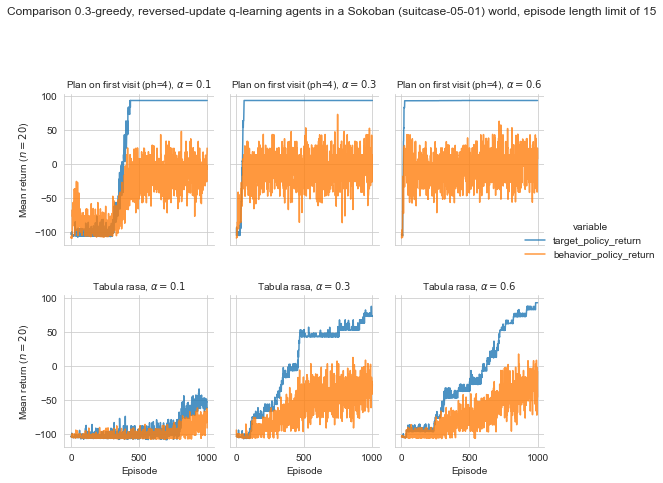

In [9]:
for mdp_label, gr in df_molten.groupby('mdp_label'):

    selector = (gr['algorithm_label'] == 'Reversed-update QL') \
                & (gr['episode_id'] <= 1000)
    
    g = sns.FacetGrid(gr[selector], col='arg_learning_rate', row='planner_label', hue='variable',
                      col_order=[0.1, 0.3, 0.6],
                      row_order=['Plan on first visit (ph=4)', 'Tabula rasa'],
                      aspect=0.7, height=3.4)
    g.map(sns.lineplot, 'episode_id', 'value', ci=None, alpha=0.8, palette='colorblind')
    g.add_legend()
    
    g.set_ylabels(f'Mean return ($n=20$)')
    g.set_xlabels(f'Episode')
    g.set_titles('{row_name}, $\\alpha={col_name}$')
    
    max_episode_length = df.loc[0, 'arg_max_episode_length']
    if 'Sokoban' in mdp_label:
        epsilon = df.loc[0, 'arg_epsilon']
        plt.suptitle(f'Comparison {epsilon}-greedy, reversed-update q-learning agents in a {mdp_label} world, episode length limit of {max_episode_length}')
    else:
        plt.suptitle(f'Comparison exploring-starts, reversed-update q-learning agents in a {mdp_label}, episode length limit of {max_episode_length}')
    
    plt.tight_layout(h_pad=3.5, rect=[0,0,0.85,0.9])
    plt.savefig(f'plots/exp4.{mdp_label}.4.pdf')